### 각 Case UUID에 대해 Diagnostic Slide와 Tissue Slide의 개수를 조사

In [3]:
import requests
import pandas as pd
import json
from tqdm import tqdm

# 1. Load case UUIDs from TSV
tsv_path = "/mnt/Code/Data/cohort_InterSection_RNA_SEG_.2025-03-27.tsv"
df_cases = pd.read_csv(tsv_path, sep='\t')
case_ids = df_cases['id'].dropna().unique().tolist()  # 컬럼 이름이 다를 경우 수정

# 2. Batch helper
def chunked(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# 3. Output records
all_records = []

# 4. Request loop (500개씩 묶음)
for batch in tqdm(chunked(case_ids, 500), total=(len(case_ids) // 500) + 1):
    url = "https://api.gdc.cancer.gov/files"
    params = {
        "filters": {
            "op": "in",
            "content": {
                "field": "cases.case_id",
                "value": batch
            }
        },
        "fields": "file_id,file_name,cases.case_id,experimental_strategy",
        "format": "JSON",
        "size": 10000
    }

    response = requests.post(url, json=params)
    data = response.json()

    # 5. Extract valid hits
    for file in data["data"]["hits"]:
        file_id = file.get("file_id")
        file_name = file.get("file_name", "N/A")
        strategy = file.get("experimental_strategy", "N/A")
        for case in file.get("cases", []):
            case_id = case.get("case_id")
            if case_id in batch and strategy in ["Diagnostic Slide", "Tissue Slide", "RNA-Seq", "miRNA-Seq"]:
                all_records.append({
                    "CASE_UUID": case_id,
                    "FILE_UUID": file_id,
                    "FILE_NAME": file_name,
                    "EXPERIMENTAL_STRATEGY": strategy
                })

# 6. Final DataFrame
df_all = pd.DataFrame(all_records)
df_all.sort_values(by='CASE_UUID')
df_all.to_csv("gdc_filtered_files.csv", index=False)
df_all.head(50)


100%|██████████| 23/23 [02:13<00:00,  5.81s/it]


,CASE_UUID,FILE_UUID,FILE_NAME,EXPERIMENTAL_STRATEGY
0,ceb7cd9a-9cb1-42f2-a4ab-0b4381e2b85b,5b34b7e7-a544-4bbb-932c-1eb74149733c,11c9e0b9-c94c-466f-877a-65325a76dcaf.rna_seq.c...,RNA-Seq
1,f2b93fbd-5848-46e2-978e-ba84e810e0dc,3f78528c-51ef-49d2-8a52-1ea09248d03d,TCGA-KIRC.fc76ae2d-e4d0-4ef0-b01e-e4c8e649c24b...,RNA-Seq
2,c499b3be-9db0-4809-b7c0-f5d81208d7ec,833b5be3-1b42-4d0f-aabd-33357f750e57,c8d944e8-b5cf-4d9f-b256-c78784ec963b.rna_seq.s...,RNA-Seq
3,ceb7cd9a-9cb1-42f2-a4ab-0b4381e2b85b,825c13b2-89d6-4634-a323-2991bfce027f,TCGA-CJ-5675-11A-01-TS1.0cf008b2-d79b-4995-a6a...,Tissue Slide
4,c499b3be-9db0-4809-b7c0-f5d81208d7ec,da4b1164-cd19-45e1-8a72-db91e75496d1,TCGA-BP-5173-01A-01-TS1.cd7832d0-ed3b-482b-a8b...,Tissue Slide
5,cba5705a-80dd-4496-9283-c5d3a92c7dba,cc7496cd-c974-4813-9674-a9998f97da58,TCGA-KIRC.66bfb7ca-d267-4222-8d17-d78b4053a070...,RNA-Seq
6,3b1f7e48-216d-47de-ba79-db350f52bff0,b1680590-4e97-4a3d-b41b-d9e84290de17,be8e200c-dced-4b24-a70d-6b6baecb7300.rna_seq.t...,RNA-Seq
7,3b1f7e48-216d-47de-ba79-db350f52bff0,37e11ae3-380d-4132-a8c5-941611ae73f2,be8e200c-dced-4b24-a70d-6b6baecb7300.rna_seq.s...,RNA-Seq
8,3b1f7e48-216d-47de-ba79-db350f52bff0,275750b4-5a4a-4019-ae2d-d25663143b21,be8e200c-dced-4b24-a70d-6b6baecb7300.rna_seq.g...,RNA-Seq
9,3b1f7e48-216d-47de-ba79-db350f52bff0,c58f9425-5789-4c8c-8bda-5e75ba382783,f06141f1-fb18-4bc2-b556-c4c64e35436f.mirbase21...,miRNA-Seq


In [ ]:
df_all = df_all.sort_values(by='CASE_UUID')
df_all = df_all[dr_all['File_NAME'] is in ]
df_all.to_csv("./Data/gdc_filtered_files.csv", index=False)

In [12]:
filtered_df = df_all[df_all['FILE_NAME'].str.endswith(('.svs', 'star_gene_counts.tsv'))]
filtered_df.to_csv("./Data/gdc_filtered_files(svs_gene_counts).csv", index=False)


Level count: 4
Level dimensions: ((76159, 29231), (19039, 7307), (4759, 1826), (2379, 913))
Slide properties:
aperio.AppMag: 40
aperio.DSR ID: resc3-dsr2
aperio.Date: 12/21/10
aperio.DisplayColor: 0
aperio.Exposure Scale: 0.000001
aperio.Exposure Time: 109
aperio.Filename: TCGA-D1-A17M-01A-02-TS2
aperio.Focus Offset: 0.000000
aperio.ICC Profile: ScanScope v1
aperio.ImageID: 43373
aperio.Left: 23.631470
aperio.LineAreaXOffset: 0.003267
aperio.LineAreaYOffset: -0.003095
aperio.LineCameraSkew: 0.001071
aperio.MPP: 0.2480
aperio.OriginalHeight: 29331
aperio.OriginalWidth: 79360
aperio.Parmset: GOG136 on RESBPCLACIE01
aperio.ScanScope ID: SS1511CNTLR
aperio.StripeWidth: 992
aperio.Time: 08:29:42
aperio.Title: TCGA-D1-A17M-01A-02-TS2
aperio.Top: 16.899681
aperio.User: c32a9987-1bee-407b-8f9a-b083130db3f7
openslide.associated.thumbnail.height: 393
openslide.associated.thumbnail.width: 1024
openslide.comment: Aperio Image Library v10.2.24
79360x29331 [0,100 76159x29231] (240x240) JPEG/RGB Q=30

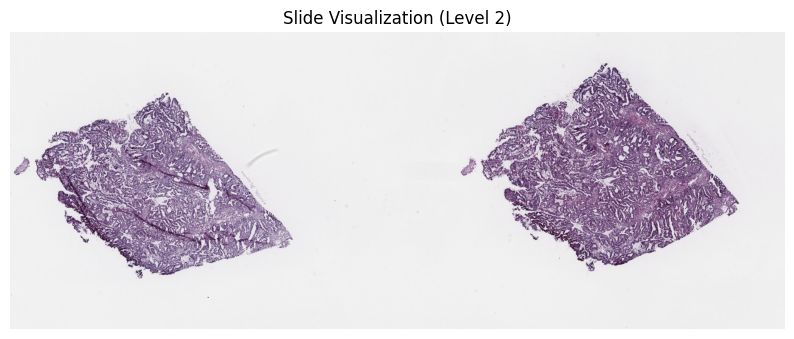

In [8]:
import openslide
import matplotlib.pyplot as plt
import os

# SVS 파일 경로
svs_path = "/mnt/Code/Data/manifest/f4277211-e7f4-414e-b230-15a2f1997be3/TCGA-D1-A17M-01A-02-TS2.2258ba92-6aa3-411b-afad-91ee27b5fd06.svs"

# OpenSlide 객체 생성
slide = openslide.OpenSlide(svs_path)

# 슬라이드 정보 출력
print("Level count:", slide.level_count)
print("Level dimensions:", slide.level_dimensions)
print("Slide properties:")
for k, v in slide.properties.items():
    print(f"{k}: {v}")

# Level 0: 가장 높은 해상도
# 일반적으로 Level 1 또는 2가 화면에 적절하게 표시됨
level = 2  # 더 낮은 해상도 (빠르게 렌더링 가능)

# 해당 레벨에서 전체 이미지 크기 가져오기
dims = slide.level_dimensions[level]
print(f"Reading level {level} with dimensions: {dims}")

# 이미지 읽기
thumbnail = slide.read_region((0, 0), level, dims)
thumbnail = thumbnail.convert("RGB")

# 시각화
plt.figure(figsize=(10, 10))
plt.imshow(thumbnail)
plt.title(f"Slide Visualization (Level {level})")
plt.axis('off')
plt.show()


In [14]:
import pandas as pd

# Load the CSV file containing filtered GDC files
csv_path = './Data/gdc_filtered_files(svs_gene_counts).csv'
df = pd.read_csv(csv_path)

# Extract the relevant columns for creating the manifest file
manifest_df = pd.DataFrame({
    'id': df['FILE_UUID'],
    'filename': '',
    'md5': '',
    'size': '',
    'state': ''
})

# Save the new DataFrame as a TSV file
output_path = '/mnt/Code/Data/temp_gdc_manifest(svs_gene_counts).tsv'
manifest_df.to_csv(output_path, sep='\t', index=False)

# Display the first few rows to confirm the transformation
manifest_df.head()


,id,filename,md5,size,state
0,ac450438-a304-4364-9407-e398ccdbcf66,,,,
1,17389e4d-435f-4a2c-b067-d4caa0be0310,,,,
2,eb00cbed-63c4-4d47-9b6a-9dde1306b8cd,,,,
3,719a8f3a-f346-42e3-b03a-7e68a267162c,,,,
4,1daf9920-afc4-4cf9-8286-cc52fb7015d3,,,,
